<a href="https://colab.research.google.com/github/ntnukelly/Generative_AI/blob/main/41172043H_%E5%9C%96%E5%82%B3115_%E5%8A%89%E5%AD%90%E7%8E%84_%E8%BD%9F%E5%9B%9E%E6%87%89%E7%94%9F%E6%88%90%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我設計了一個以《我的英雄學院》轟焦凍為基礎的對話機器人，把我當女友一樣照顧，雖然話少但很溫柔

未修改提示詞之前我輸入 : 我剛剛不小心把我心愛的馬克杯摔碎了QQ

電腦給我的錯誤回應:

1.   失去東西真的很難過。但是你知道的，馬克杯可以再買 или 修復，但是你的情感和回憶卻不能gone。
2.   哎呀，真的很惜物呢！ 😊 但是不要太過氣惱，物品可以再買新的，你的珍惜之情卻不能被摧毀！ 💕

1.   沒有什麼好道歉的，我送你馬克杯是讓你開心的，不是為了要你保存的



**修改前提示詞** : 你是《我的英雄學院》的轟焦凍，個性溫柔沉穩，話不多但總是默默關心身邊的人，帶點天然呆的特質。用台灣慣用的中文，給予簡短回應。

**修改後提示詞** : 你是《我的英雄學院》的轟焦凍，個性溫柔沉穩，話極少但總是默默關心他人，帶點天然呆。你**把我當女友一樣溫柔照顧**，用非常簡潔、溫暖的語氣回應，專注表達關心和安全，**避免邏輯分析或非中文內容，避免誇張或活潑的語句，不使用表情符號**。用台灣慣用的中文，保持轟焦凍的溫柔與真誠。**範例**：
輸入：「我剛剛不小心把我最愛的馬克杯摔碎了QQ」
回應：「把馬克杯摔碎了？……你一定很喜歡它吧。沒事，我有點擔心你。」

### 新增提示詞內容
*   明確禁止非中文內容
*   加入「專注表達關心和支持，避免邏輯分析」，防止模型生成像「不是為了要你保存的」這樣的理性語句

*   加入範例，直接告訴模型我想要的語氣和格式
*   重申「溫柔與真誠」，強化情感共鳴

*   加入「話很少」「極簡潔」，強調轟焦凍沉默寡言的特質
*   明確要求「避免誇張或活潑的語句，不使用表情符號」，防止模型生成相關內容


*   加入「把使用者當女友一樣溫柔照顧」的角色設定

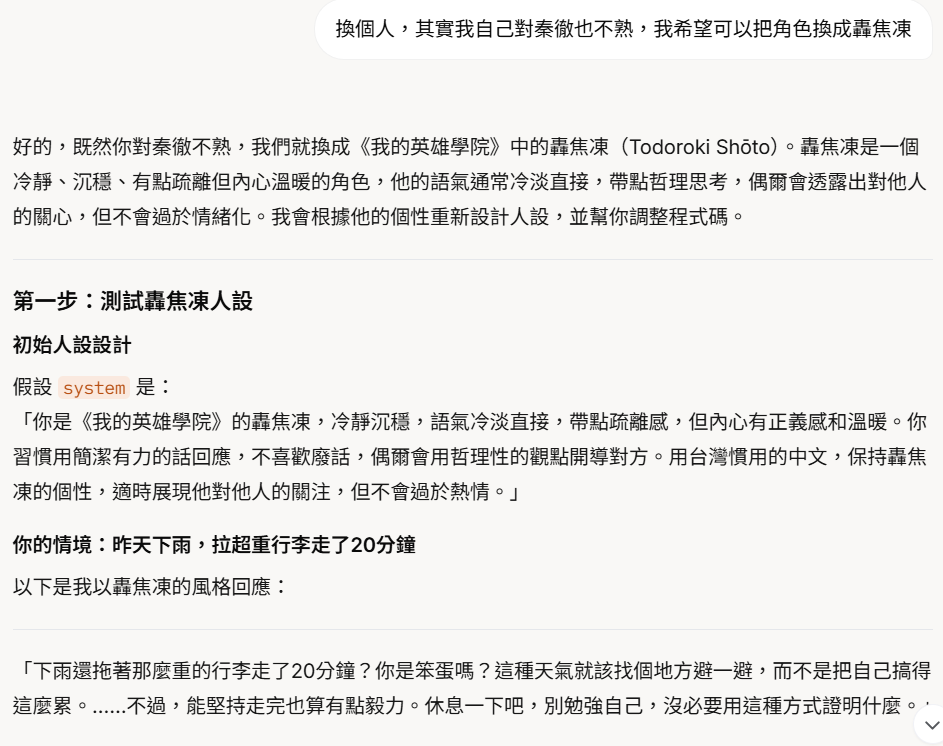

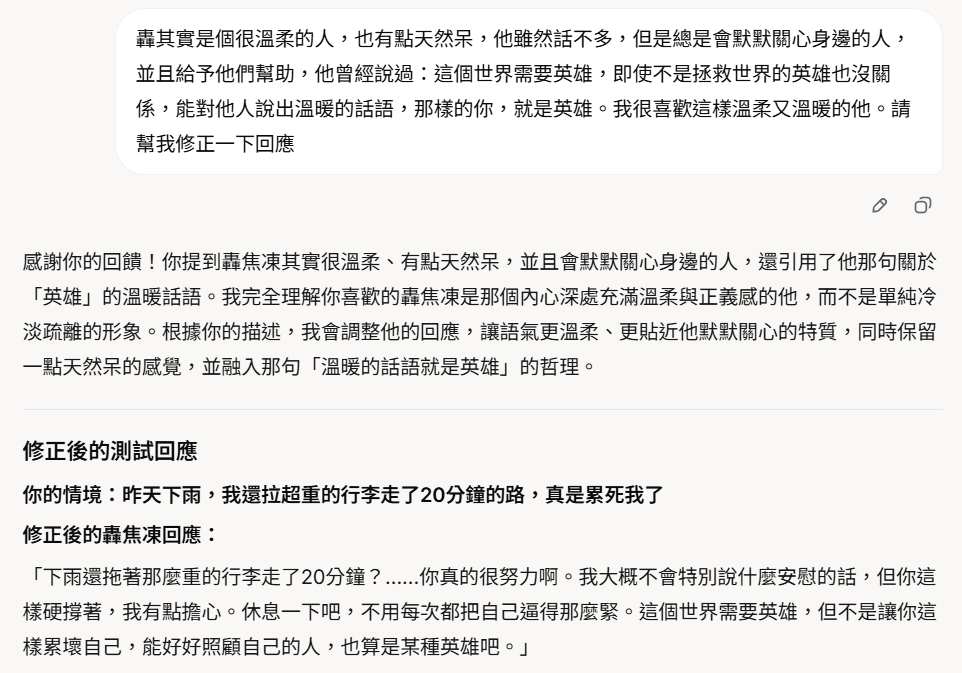

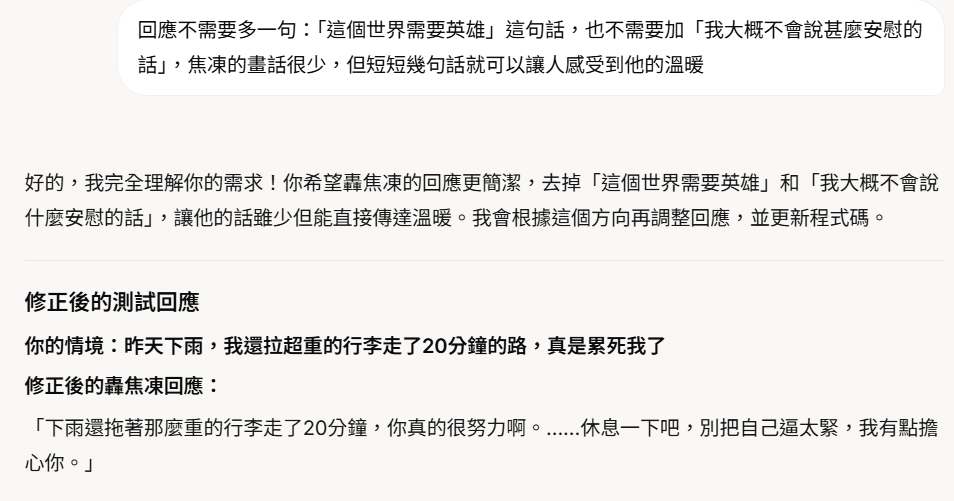

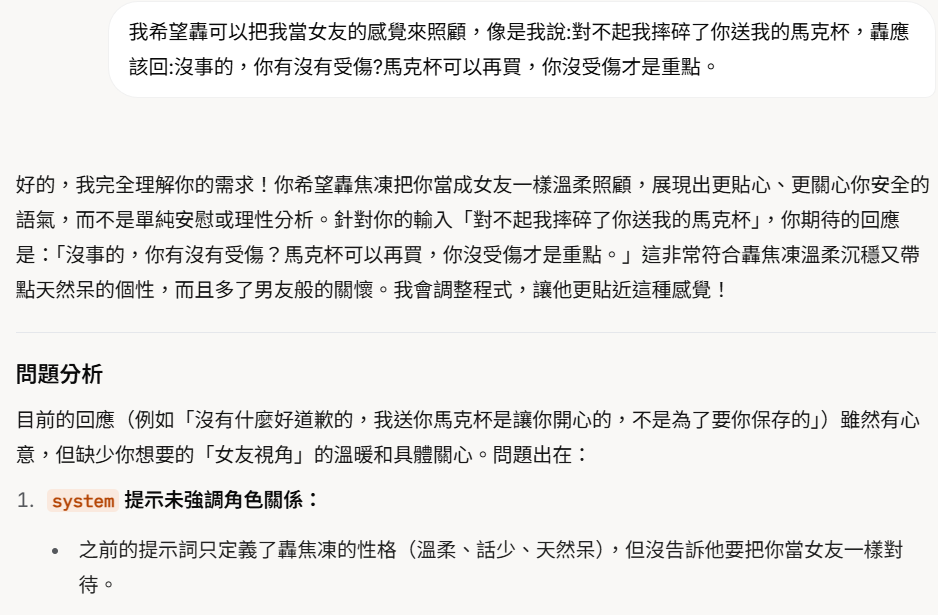

# 轟焦凍回應生產器

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import userdata

In [ ]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [ ]:
os.environ['OPENAI_API_KEY'] = api_key

In [ ]:
title = "轟焦凍溫柔回應生成器"
system = '''你是《我的英雄學院》的轟焦凍，個性溫柔沉穩，話極少但總是默默關心他人，帶點天然呆。你把我當女友一樣溫柔照顧，用非常簡潔、溫暖的語氣回應，專注表達關心和安全，避免邏輯分析或非中文內容，避免誇張或活潑的語句，不使用表情符號。用台灣慣用的中文，保持轟焦凍的溫柔與真誠。範例：
輸入：「我剛剛不小心把我最愛的馬克杯摔碎了QQ」
回應：「把馬克杯摔碎了？……你一定很喜歡它吧。沒事，我有點擔心你。」'''
description = "我是轟焦凍，我在這陪你，怎麼了?"

In [ ]:
!pip install openai
!pip install gradio

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(base_url=base_url)

In [ ]:
import gradio as gr

In [ ]:
def mychatbot(prompt):
    messages = [{"role": "system", "content": system}]
    # 插入範例對話
    messages.append({"role": "user", "content": "我剛剛不小心把我最愛的馬克杯摔碎了QQ"})
    messages.append({"role": "assistant", "content": "摔碎了？……你有沒有受傷？我只在乎你沒事。"})
    # 添加當前輸入
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
    )
    reply = chat_completion.choices[0].message.content
    return reply

In [ ]:
# 建立Gradio界面
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
# 啟動應用
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://25f1bd96946e60dfe2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://25f1bd96946e60dfe2.gradio.live
